In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import torch


In [3]:

def to_networkx(data, node_attrs=None, edge_attrs=None, to_undirected=False, node_dic=None,
                remove_self_loops=False):
    r"""MODIFIED FROM PYTORCH GEOMETRIC FUNCTION
    Converts a :class:`torch_geometric.data.Data` instance to a
    :obj:`networkx.Graph` if :attr:`to_undirected` is set to :obj:`True`, or
    a directed :obj:`networkx.DiGraph` otherwise.
 
    Args:
        data (torch_geometric.data.Data): The data object.
        node_attrs (iterable of str, optional): The node attributes to be
            copied. (default: :obj:`None`)
        edge_attrs (iterable of str, optional): The edge attributes to be
            copied. (default: :obj:`None`)
        to_undirected (bool, optional): If set to :obj:`True`, will return a
            a :obj:`networkx.Graph` instead of a :obj:`networkx.DiGraph`. The
            undirected graph will correspond to the upper triangle of the
            corresponding adjacency matrix. (default: :obj:`False`)
        remove_self_loops (bool, optional): If set to :obj:`True`, will not
            include self loops in the resulting graph. (default: :obj:`False`)
    """
 
    if to_undirected:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
 
#    G.add_nodes_from(range(data.num_nodes))
 
    node_attrs, edge_attrs = node_attrs or [], edge_attrs or []
 
    values = {}
    for key, item in data(*(node_attrs + edge_attrs)):
        if torch.is_tensor(item):
            values[key] = item.squeeze().tolist()
        else:
            values[key] = item
        if isinstance(values[key], (list, tuple)) and len(values[key]) == 1:
            values[key] = item[0]
 
    for i, (u, v) in enumerate(data.edge_index.t().tolist()):
 
        if to_undirected and v > u:
            continue
 
        if remove_self_loops and u == v:
            continue
        u_tag, v_tag = node_dic[u], node_dic[v]
        G.add_edge(u_tag, v_tag)
 
        for key in edge_attrs:
            G[u_tag][v_tag][key] = round(values[key][i])
 
    # Assign node attributes
    for key in node_attrs:
        node_values_dic = {node_dic[i]: {key: data[key][i].item()} for i in range(len(node_dic))}
        nx.set_node_attributes(G, node_values_dic)
 
    return G
 

In [6]:

from torch_geometric.data import Data
snapshot = Data(x=[10, 1], edge_index=[2, 28], edge_attr=[28], y=[10, 1], global_features=[30])


nodes_dic_inv = {
        0: 'NO2',
        1: 'NO3',
        2: 'NO4',
        3: 'NO1',
        4: 'FI',
        5: 'DK1',
        6: 'SE2',
        7: 'SE3',
        8: 'NO5',
        9: 'SE1',

}

G = to_networkx(snapshot, 
                node_attrs=['x'],
                edge_attrs=['edge_attr'],
                to_undirected=False, node_dic=nodes_dic_inv)

G.nodes.data()
 
coordinates = {'NO2': {'lat': 59.522901, 'lon': 7.842521}, \
               'NO1': {'lat': 60.538724, 'lon': 11.015993}, \
               'NO1': {'lat': 60.538724, 'lon': 11.015993}, \
               'SE3': {'lat': 59.029083, 'lon': 15.136678}, \
               'NO3': {'lat': 62.776586, 'lon': 9.544526}, \
               'NO5': {'lat': 60.959681, 'lon': 6.087871}, \
               'DK1': {'lat': 56.263598, 'lon': 9.362677}, \
               'NO4': {'lat': 65.581344, 'lon': 13.585454}, \
               'SE2': {'lat': 63.852089, 'lon': 16.228280}, \
               'SE1': {'lat': 66.002283, 'lon': 20.357983}, \
               'FI': {'lat': 62.933040 , 'lon': 26.449689}, \
               'SE4': {'lat': 56.521626, 'lon': 14.789292}, \
               'DK2': {'lat': 55.535112, 'lon': 11.462506}}


fig, ax = plt.subplots(figsize=(20,18))
cmap = plt.get_cmap('viridis')
pos = {x[0]: (x[1]['lon'], x[1]['lat']) for x in coordinates.items()}
alpha = 0.8
 
edge_labels = dict([((u, v,), f'{d["edge_attr"]}\n\n{G.edges[(v,u)]["edge_attr"]}')
                for u, v, d in G.edges(data=True) if pos[u][0] > pos[v][0]])
 
node_values = [x[1]['x']*scaling for x in G.nodes.data()]
 
nx.draw(G, pos,
        node_size=2000, alpha=alpha, # node size and alpha
        cmap=cmap, node_color=node_values, #
        with_labels=True, font_weight="bold",  # Labels on nodes in bold
        arrows=True, connectionstyle='arc3, rad = 0.1')  # bending edges with arrows
       
nx.draw_networkx_edge_labels(G, pos, edge_labels)
 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(node_values), vmax=max(node_values)))
sm._A = []
fig.colorbar(sm, alpha=alpha, label='Regulation')
 
#nx.draw_networkx_labels(G, pos, font_size=10)
#plt.show()
plt.savefig('graph.png', transparent=True)

ModuleNotFoundError: No module named 'torch_sparse'

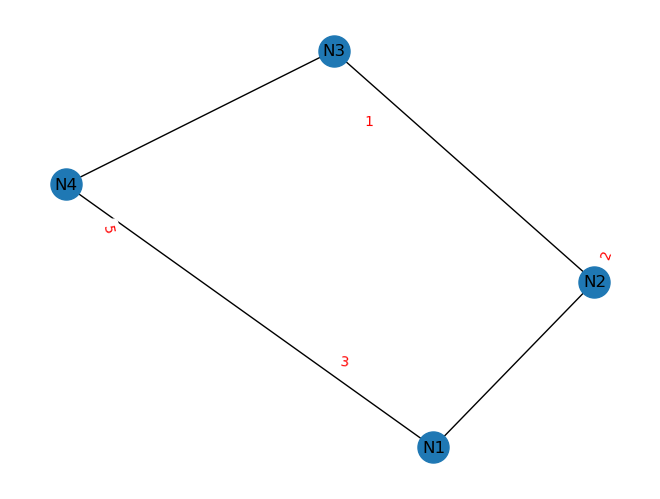

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# create an empty graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(["N1", "N2", "N3", "N4"])

# add edges to the graph
G.add_edge("N1", "N2", weight = 5)
G.add_edge("N2", "N3", weight = 2)
G.add_edge("N3", "N4", weight = 3)
G.add_edge("N1", "N4", weight = 1)
pos = nx.spring_layout(G)

edge_labels = {
    ("N1", "N2"): "5",
    ("N2", "N3"): "3",
    ("N3", "N4"): "2",
    ("N1", "N4"): "1",
}



nx.draw(G, pos, labels={node: node for node in G.nodes()}, node_size = 500)
pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red'
)
plt.axis('off')
plt.show()

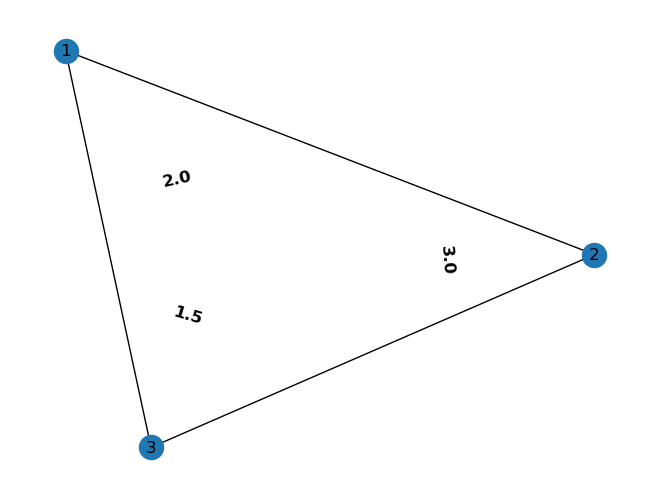

In [50]:
import networkx as nx

# Create a graph object
g = nx.Graph()

# Add nodes to the graph
g.add_node(1, label="Node 1")
g.add_node(2, label="Node 2")
g.add_node(3, label="Node 3")

# Add edges to the graph
g.add_edge(1, 2, weight=2.0)
g.add_edge(1, 3, weight=1.5)
g.add_edge(2, 3, weight=3.0)

# Add labels to the nodes
# nx.set_node_attributes(g, values={1: "Node 1", 2: "Node 2", 3: "Node 3"}, name="label")

# Plot the graph
nx.draw(g, with_labels=True)

edge_labels = {(1, 2): 2.0, (1, 3): 1.5, (2, 3): 3.0}

# Plot the edge labels
nx.draw_networkx_edge_labels(g, pos=nx.spring_layout(g), edge_labels=edge_labels, 
                             font_size=12, font_weight="bold")

plt.show()